# Introduction
This notebook is a personal exploration of an end-to-end data science process and serves as a learning process for myself as I continue to pursue a career in data science. <br>

I am completing a submission for the Kaggle Spaceship-Titanic Competition. The goal of the competition is to create a machine learning model that can predict passenger outcome after a spaceship crash scenario. 

_"The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage...the unwary Spaceship Titanic collided with a spacetime anomaly...To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system._

#### **Evaluation Metric**

Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.




### Imports

In [1]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data Inputs

In [2]:
# !unzip data/spaceship-titanic.zip -d data/

test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
pd.set_option("display.max_rows", None)

# 1. Exploratory Data Analysis

## 1.1 Preliminary Observations

In [3]:
print("train: ", train.shape)
train.head(5)

train:  (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print("test: ", test.shape)
test.head(5)

test:  (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
# Percentages of missing values
train.isna().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

### Numerical Columns from train

In [8]:
# List of numerical features
num_features = train.select_dtypes(exclude='object').copy()
print("Number of numerical features: ", len(num_features.columns))
num_features.columns

Number of numerical features:  7


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [9]:
num_features.describe().round(decimals=2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


### Categorical Features from train

In [10]:
cat_features = train.select_dtypes(include='object').copy()
print("Number of categorical features: ", len(cat_features.columns))
cat_features.columns

Number of categorical features:  7


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [11]:
cat_features.describe().round(decimals=2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Notes for Data Cleaning & Processing:

None of the features have significant amounts of missing values. The highest being "CryoSleep" with 2.5% of values missing. There is potential to predict missing values based on other features using an algorithm such as KNN Imputation.

## 1.2 Univariate Analysis

First, it is good practice to evaluate the skew of the target column as it may adversely affect the outcome of the prediction accuracy of regression models. This is not required (or possible) for our dataset as the target is a binary variable.

Note: Correcting skew is important for Linear Regression, but not necessary for Decision Trees and Random Forests.

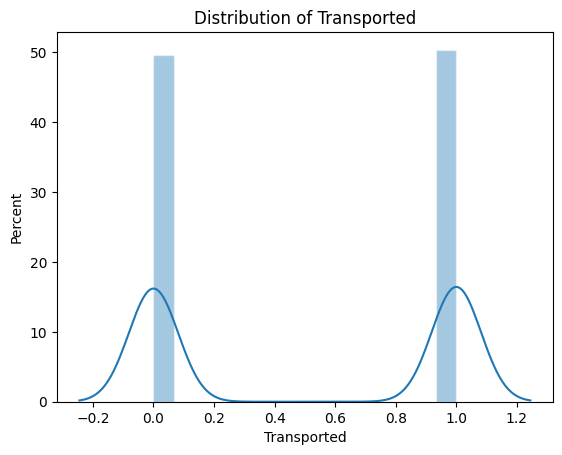

In [12]:
plt.figure()
sns.histplot(
    train.Transported, kde=True,
    stat="percent", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
plt.title('Distribution of Transported')
plt.show()

### Numerical Features

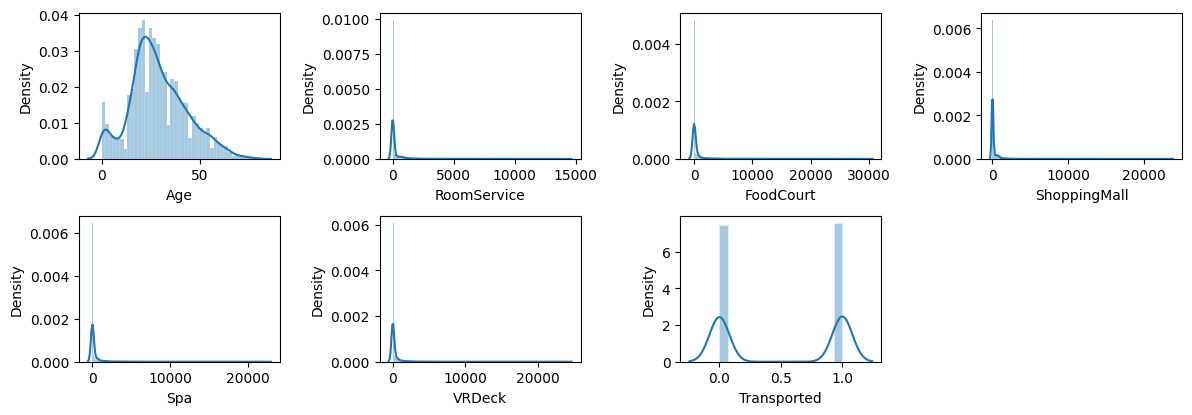

In [13]:
fig = plt.figure(figsize=(12,18))
for i in range(len(num_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.histplot(
    num_features.iloc[:,i].dropna(), kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
    plt.xlabel(num_features.columns[i])

plt.tight_layout(pad=1.0)

The numerical features, besides "Age" and "Transported", all are heavily right skewed. Based on the data field descriptions, "RoomService", "FoodCourt", "ShoppingMall", "Spa", and "VRDeck" all indicate the total amount of money billed to each passenger for each service throughout the duration of the voyage. The heavy right skew makes sense as the distribution for money spent on a luxury.

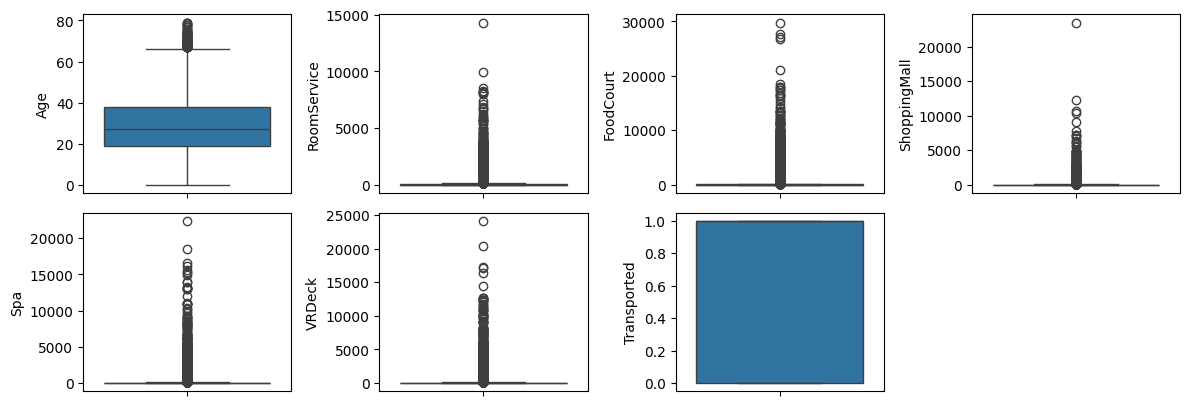

In [14]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_features.iloc[:,i])

plt.tight_layout()

Taking a look at potential outliers, there only exists a few points within RoomService and ShoppingMall that seem to be outliers.

In [15]:
train.sort_values(by='ShoppingMall', ascending=False).head(10)[['ShoppingMall']]

,ShoppingMall
8415,23492.0
6223,12253.0
7425,10705.0
4724,10424.0
5673,9058.0
6453,7810.0
385,7185.0
8315,7148.0
637,7104.0
5137,6805.0


In [16]:
train.sort_values(by='RoomService', ascending=False).head(10)[['RoomService']]

,RoomService
4416,14327.0
5105,9920.0
8626,8586.0
7933,8243.0
7118,8209.0
1177,8168.0
4762,8151.0
5725,8142.0
928,8030.0
75,7406.0


Notes for Data Cleaning & Processing:

I can log transform the right skewed features to get a more normal distribution. This would reduce the impact of the outliers while eliminating the need to remove observation points from the training dataset. Given that there is still a lot of data points on the tails of the distribution, eliminating too many points may reduce accuracy.

### Categorical Features

In [17]:
cat_features.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

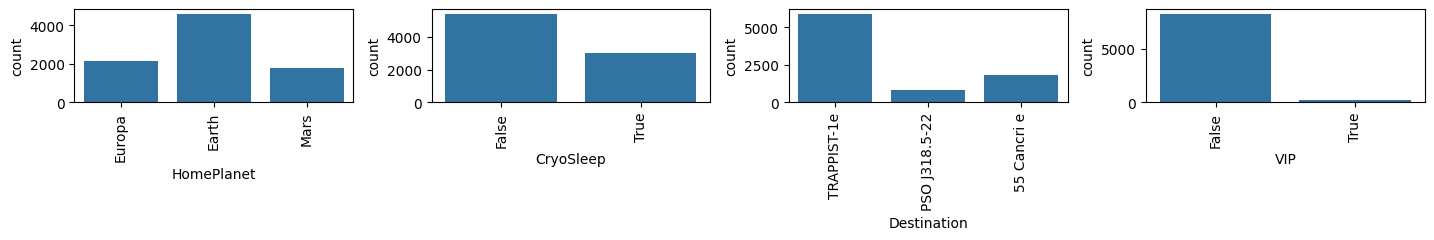

In [18]:
cat_features_visual = cat_features[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']]

fig = plt.figure(figsize=(18,20))
for index in range(len(cat_features_visual.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_features_visual.iloc[:,index], data=cat_features_visual.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

There doesn't seem to be anything out of the ordinary for the non-identifier categorical variables.

In [19]:
train.Cabin.head(5)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

Notes for Feature Engineering:

One interesting thing to note relates to the "Cabin" feature. The data in this feature indicates deck/num/side (where side indicates P - Port, S - Starboard). I can create additional features that extract the location of a passenger's cabin. This information could prove useful given location of cabins typically highly affect survival outcomes in disaster scenarios.

## Bivariate Analysis

<Axes: title={'center': 'Correlation of numerical attributes'}>

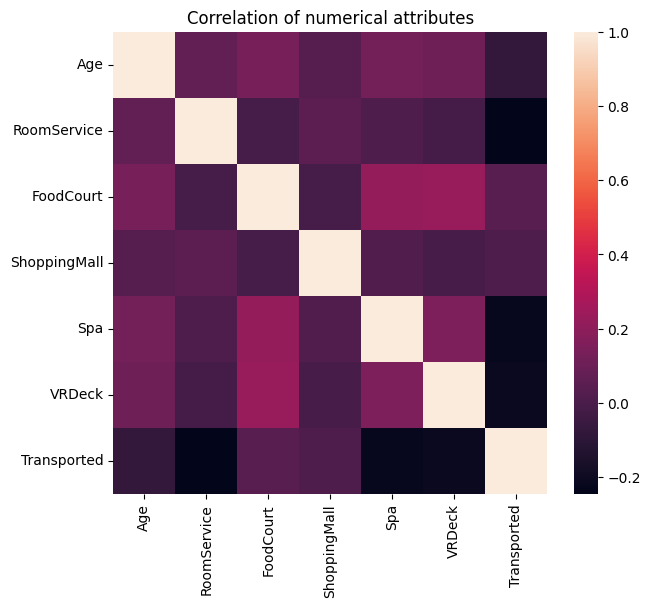

In [20]:
plt.figure(figsize=(7,6))
plt.title('Correlation of numerical attributes', size=12)
correlation = num_features.corr()
sns.heatmap(correlation)

In [21]:
correlation = train.select_dtypes(exclude=['object']).corr()
correlation[['Transported']].sort_values(['Transported'], ascending=False)

,Transported
Transported,1.000000
FoodCourt,0.046566
ShoppingMall,0.010141
Age,-0.075026
VRDeck,-0.207075
Spa,-0.221131
RoomService,-0.244611


At first glance, RoomService, Spa, and VRDeck are more inversely related to the target Transport. This may be because of the location of these services were more impacted during the disaster incident. Higher spenders were more likely to be in these locations during the time of the incident.

There is some correlation between the other features themselves, but not significant enough to invoke multicollinearity skewing.

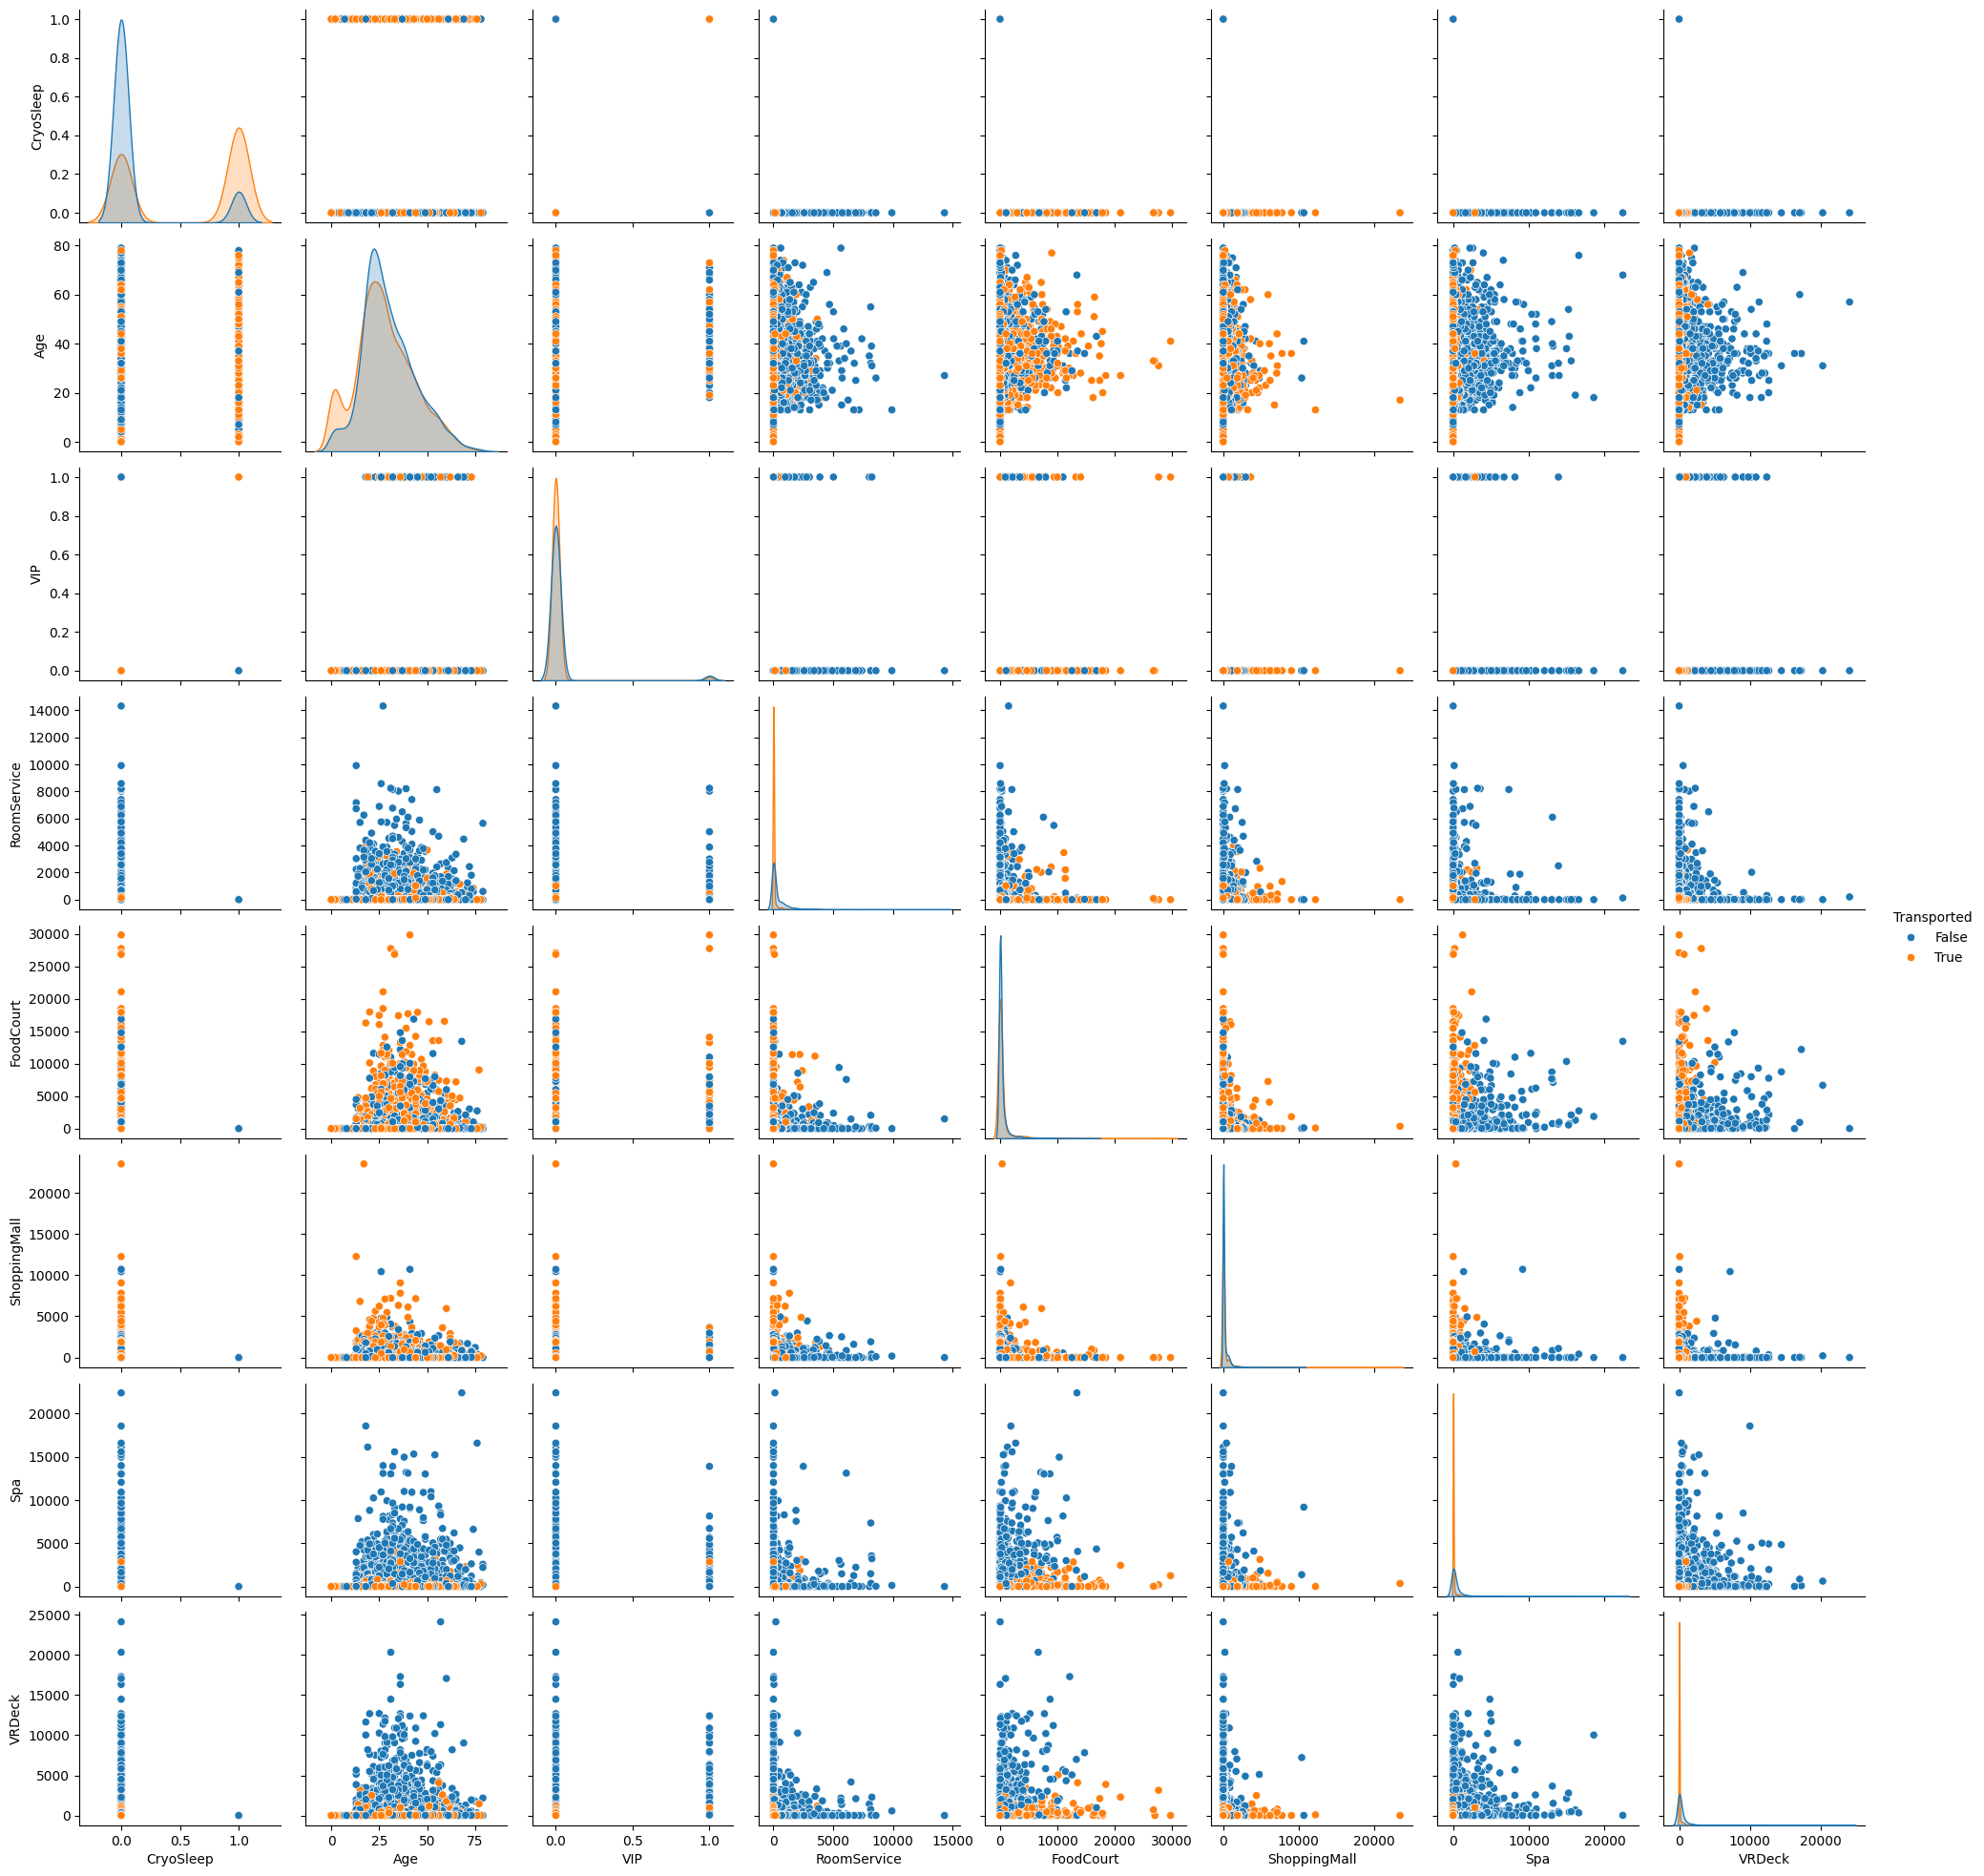

In [22]:
sns.pairplot(train, hue="Transported")

Looking at the pairwise plots, my main hypothesis is that location aboard the ship is the main factor in whether a passenger was transported at the time of the incident. This more enforces my idea of feature engineering the cabin locations for training.

# 2. Data Cleaning

Steps:
1. Removing redundant features
2. Filling missing data
3. Dealing with outliers

Since I will be log-transforming feature values, I need to populate missing values first before removing outliers. In the case that I'd be removing outliers, intorducing artificial data could potentially skew and alter what is considered an outlier. But since I am log transforming with a predicted value, this risk should be minimized.

## 2.1 Removing redundant features

There aren't any features that I feel need to be removed due to multicollinearity.

## 2.2 Filling in Missing Values

### Cabin
This feature is the most important to get accurate when filling missing data because I will be conducting feature engineering on the values. Because of this, and the fact that only 2% of values are missing, I will remove rows where this is missing. I do not want to populate with artifical values that will then have propogating effects through feature engineering without knowing the importance/correlation to the target variable.

### Name

Since identifier column, populate with "No Name". 

### Age

Populate with Median age.

### VIP

Populate with 0, assume no VIP status.

### HomePlanet, Destination
Populate with most common locations.

### ShoppingMall, FoodCourt, RoomService, Spa, VRDeck

Set 0 as default for any missing values. Assuming no purchases.

### Cryosleep

CryoSleep is defined as a passenger sleeping for the whole duration of the trip. I can populate the missing values based on if any other feature has value. Ie. If the passenger spent money at the mall, they can't be in cryosleep.





In [23]:
train_clean = train.copy()

## Cabin
train_clean = train_clean.loc[~train_clean['Cabin'].isnull()]

## Name
train_clean['Name'].fillna('No Name', inplace=True)

## Age
train_clean['Age'].fillna(train_clean['Age'].median(), inplace=True)

## VIP
train_clean['VIP'].fillna(0, inplace=True)

## HomePlanet, Destination
train_clean['HomePlanet'].fillna(train_clean['HomePlanet'].mode()[0], inplace=True)
train_clean['Destination'].fillna(train_clean['Destination'].mode()[0], inplace=True)

## ShoppingMall, FoodCourt, RoomService, Spa, VRDeck
check_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in check_cols:
    train_clean[col].fillna(0, inplace=True)

## CryoSleep
mask = train_clean['CryoSleep'].isna()

train_clean.loc[mask, 'CryoSleep'] = np.where(
    (train_clean.loc[mask, check_cols] > 0).any(axis=1), 
    0,  # if any > 0
    1   # else
)


## 2.3 Dealing with Outliers

I will log transform the heavily right skewed numerical features.

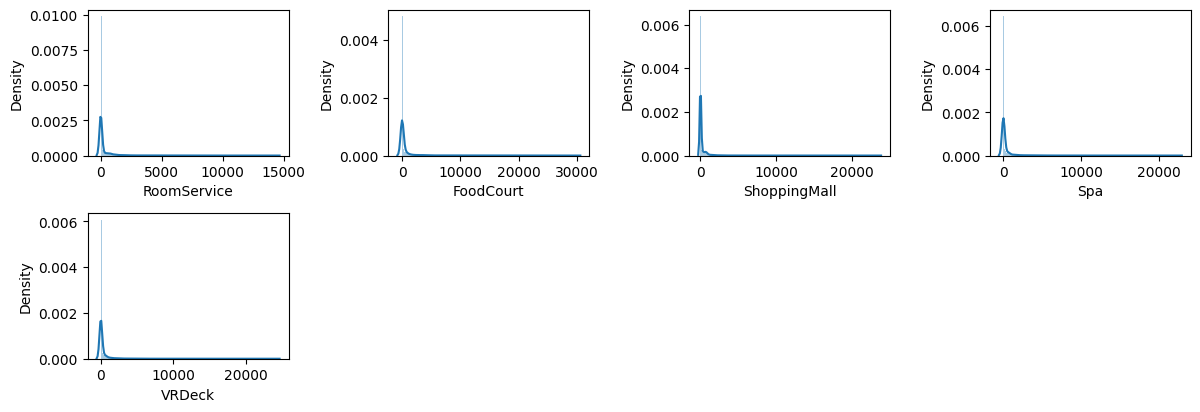

In [24]:
features_to_transform = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig = plt.figure(figsize=(12, 18))

for i, col in enumerate(features_to_transform):
    if col in train.columns:
        fig.add_subplot(9, 4, i + 1)
        sns.histplot(
            train[col].dropna(), kde=True,
            stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4)
        )
        plt.xlabel(col)

plt.tight_layout(pad=1.0)

In [25]:
for feature in features_to_transform:
    train_clean[f'{feature}_log'] = np.log1p(train_clean[feature])
    test[f'{feature}_log'] = np.log1p(test[feature])

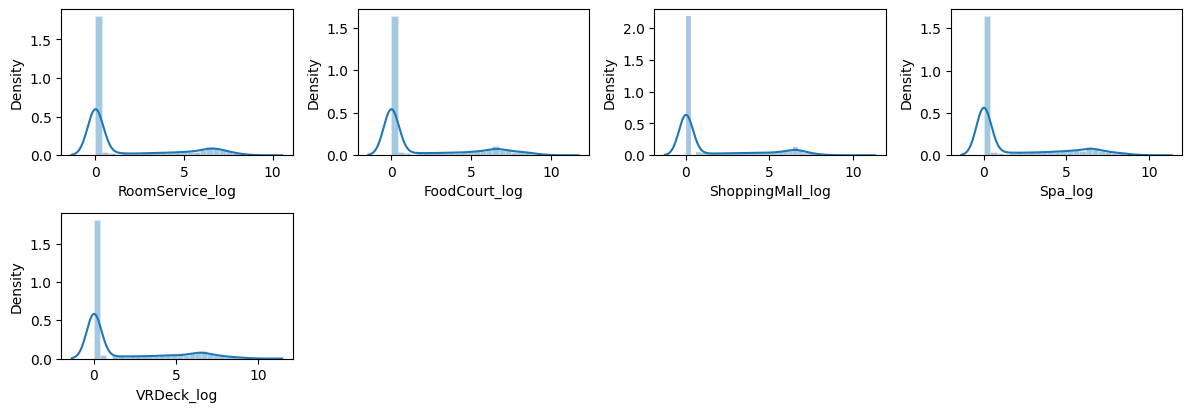

In [26]:
tmp = ['RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log']

fig = plt.figure(figsize=(12, 18))

for i, col in enumerate(tmp):
    if col in train_clean.columns:
        fig.add_subplot(9, 4, i + 1)
        sns.histplot(
            train_clean[col].dropna(), kde=True,
            stat="density", kde_kws=dict(cut=3),
            alpha=.4, edgecolor=(1, 1, 1, .4)
        )
        plt.xlabel(col)

plt.tight_layout(pad=1.0)

In [27]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8494 non-null   object 
 1   HomePlanet        8494 non-null   object 
 2   CryoSleep         8494 non-null   object 
 3   Cabin             8494 non-null   object 
 4   Destination       8494 non-null   object 
 5   Age               8494 non-null   float64
 6   VIP               8494 non-null   object 
 7   RoomService       8494 non-null   float64
 8   FoodCourt         8494 non-null   float64
 9   ShoppingMall      8494 non-null   float64
 10  Spa               8494 non-null   float64
 11  VRDeck            8494 non-null   float64
 12  Name              8494 non-null   object 
 13  Transported       8494 non-null   bool   
 14  RoomService_log   8494 non-null   float64
 15  FoodCourt_log     8494 non-null   float64
 16  ShoppingMall_log  8494 non-null   float64
 17  

# 3. Feature Engineering

In [28]:
train_clean[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train_clean['Cabin'].str.split('/', expand=True)
test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test['Cabin'].str.split('/', expand=True)

In [29]:
train_final = pd.get_dummies(train_clean[['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log', 'Cabin_Deck', 'Cabin_Side']])
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transported                8494 non-null   bool   
 1   Age                        8494 non-null   float64
 2   RoomService_log            8494 non-null   float64
 3   FoodCourt_log              8494 non-null   float64
 4   ShoppingMall_log           8494 non-null   float64
 5   Spa_log                    8494 non-null   float64
 6   VRDeck_log                 8494 non-null   float64
 7   HomePlanet_Earth           8494 non-null   bool   
 8   HomePlanet_Europa          8494 non-null   bool   
 9   HomePlanet_Mars            8494 non-null   bool   
 10  CryoSleep_False            8494 non-null   bool   
 11  CryoSleep_True             8494 non-null   bool   
 12  Destination_55 Cancri e    8494 non-null   bool   
 13  Destination_PSO J318.5-22  8494 non-null   bool   
 1

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   HomePlanet        4190 non-null   object 
 2   CryoSleep         4184 non-null   object 
 3   Cabin             4177 non-null   object 
 4   Destination       4185 non-null   object 
 5   Age               4186 non-null   float64
 6   VIP               4184 non-null   object 
 7   RoomService       4195 non-null   float64
 8   FoodCourt         4171 non-null   float64
 9   ShoppingMall      4179 non-null   float64
 10  Spa               4176 non-null   float64
 11  VRDeck            4197 non-null   float64
 12  Name              4183 non-null   object 
 13  RoomService_log   4195 non-null   float64
 14  FoodCourt_log     4171 non-null   float64
 15  ShoppingMall_log  4179 non-null   float64
 16  Spa_log           4176 non-null   float64


In [32]:
# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log', 'Cabin_Deck', 'Cabin_Side']


train_X = train_final.drop('Transported', axis=1)
train_y = train_final[['Transported']]

X_test = pd.get_dummies(test[features])

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

rf_model.fit(train_X, train_y)
predictions = rf_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


/Users/mikeyang/Code/Notebooks/.venv/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Run Results:
#1 - 0.77694

## Improvements for future

- I took the liberty to make assumptions during the data cleaning section. For the following features, I can try to predict the values based off spending of populated features.
    - VIP
    - HomePlanet
    - Destination
    - ShoppingMall
    - FoodCourt
    - RoomService
    - Spa
    - VRDeck